In [99]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import scipy.io as sio

In [101]:
n6_1 = CortProcessor('/home/diya/Documents/rat-fes/data/filipe_data/mixed_n5_n9/N5_170929_No Obstacles_s.mat')
n6_2 = CortProcessor('/home/diya/Documents/rat-fes/data/filipe_data/mixed_n5_n9/N6_171211_No Obstacles_s.mat')

this is filipe data i belive
this is filipe data i belive


In [102]:
sess = CCAProcessor(n6_1, n6_2)

should be good to align


In [30]:
n6_2.decode_angles([sess.data['cp1']['proc_x']], [sess.data['cp1']['proc_y']])

Singular matrix
did you run process() first.


In [64]:
full_temp = sess.data['cp1']['proc_x']

In [61]:
temp = sess.data['cp1']['proc_x'][:,4]

In [81]:
temp_rates = full_temp.T
temp_rates_remove = temp_rates[~np.all(np.average(temp_rates, 1) < .1, axis=1)]

AxisError: axis 1 is out of bounds for array of dimension 1

In [91]:
np.average(full_temp, 0) < .1

array([False, False,  True, False,  True, False, False, False, False,
       False, False, False, False])

In [98]:
full_temp[:, np.average(full_temp, 0) > .1].shape

(8749, 11)

In [77]:
np.average(full_temp, 0)

array([1.42448610e+01, 2.81292633e+01, 2.47647350e-03, 4.37348530e+01,
       4.40866711e-03, 5.73281830e+01, 6.33414753e+01, 2.79222210e+01,
       9.01695079e+00, 3.94039356e-01, 1.23324492e+00, 4.75148300e+01,
       5.49518230e+01])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
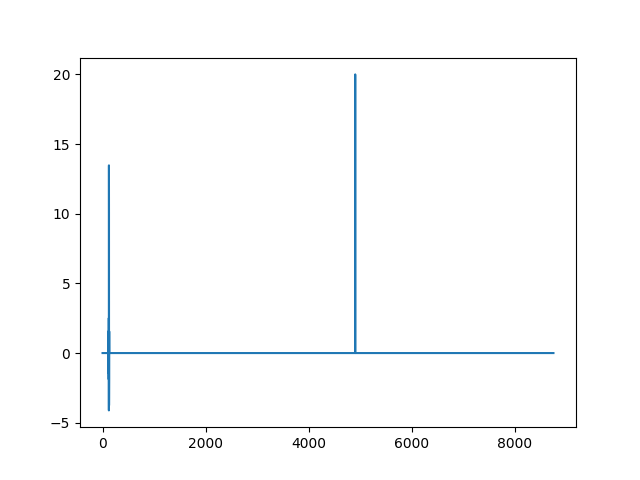

In [79]:
fig, ax = plt.subplots()
ax.plot(sess.data['cp1']['proc_x'][:,4])
#ax.plot(sess.data['cp2']['proc_x'][:,0])

In [71]:
np.average(sess.data['cp1']['proc_x'][:,9])

0.3940393556467355

In [ ]:
sess.get_better_decoder()

cp2 is better


# how does each decoder work individually before PCA

In [78]:
print(np.average(sess.cp1.vaf,1))

[0.39021552 0.3651861  0.16678314 0.59662881 0.26422408]


In [79]:
print(np.average(sess.cp2.vaf,1))

[0.55482048 0.61057617 0.08470028 0.64644188 0.17887724]


# how does each decoder work after PCA

In [80]:
num_components, cp1_pca, cp2_pca = sess.PCA_to_same_dimensions(preset_num_components=13)

In [81]:
cp1_pca_h, vaf1, nada, nada = n6_1.decode_angles(X=[sess.cp1.pca_x], Y=[sess.cp1.proc_y])
cp2_pca_h, vaf2, nada, nada = n6_2.decode_angles(X=[sess.cp2.pca_x], Y=[sess.cp2.proc_y])

In [82]:
np.average(vaf1, 1)

array([0.3792569 , 0.37880738, 0.17440474, 0.57924145, 0.27144407])

In [83]:
np.average(vaf2, 1)

array([0.57011251, 0.621321  , 0.16511856, 0.65561998, 0.21160301])

# x2 data on x1 decoder

In [84]:
format_x1, format_y1 = format_data(sess.cp1.pca_x, sess.cp1.proc_y)
format_x2, format_y2 = format_data(sess.cp2.pca_x, sess.cp2.proc_y)

In [85]:
y1_hat = test_wiener_filter(format_x1, cp1_pca_h)
vaf(format_y1[:,1], y1_hat[:,1])

0.3492706072727201

In [86]:
y2_hat = test_wiener_filter(format_x2, cp1_pca_h)
vaf(format_y2[:,1], y2_hat[:,1])

-0.4048303675777831

In [87]:
sess.num_components

13

# x2 cca data on x1 decoder

In [88]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [89]:
cca_x1x2 = CCA(n_components=sess.num_components, scale=False)
x1_cca, x2_cca=cca_x1x2.fit_transform(sess.cp1.pca_x, sess.cp2.pca_x)

In [90]:
x2_hat = cca_x1x2.inverse_transform(x2_cca) 

In [91]:
format_x2_hat, format_y2 = format_data(x2_hat, sess.cp2.proc_y)

In [92]:
format_x2_hat.shape, format_y2.shape

((6780, 130), (6780, 5))

In [93]:
y2_predic = test_wiener_filter(format_x2_hat, cp1_pca_h)
vaf(format_y2[:,1], y2_predic[:,1])

0.19369626547405838

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
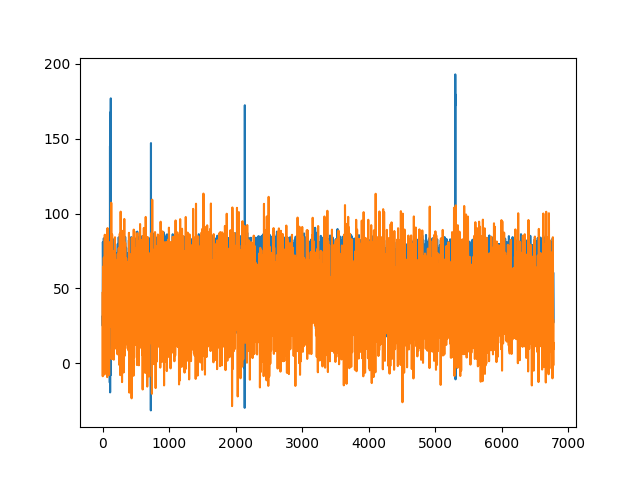

In [94]:
fig, ax = plt.subplots()
ax.plot(format_y2[:,1])
ax.plot(y2_predic[:,1])


In [95]:
format_x2, format_y2 = format_data(sess.cp2.pca_x, sess.cp2.proc_y)
y2_old_predic = test_wiener_filter(format_x2, cp1_pca_h)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
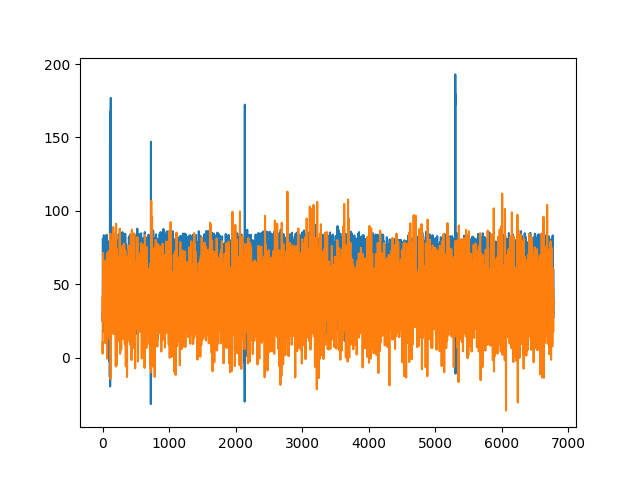

In [96]:
fig, ax = plt.subplots()
ax.plot(format_y2[:,1])
ax.plot(y2_old_predic[:,1])